# Polaris-Arctic Demo Visualization

1. Arctic Condition Monitoring
    - Making informed decisions based on current and future conditions

2. Arctic Risk Assessment
    - Analysis and estimations for pre-defined artic voyages

3. Arctic Route Planner
     - Route planning based on multi-objective route optimization
     

In [1]:
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import cartopy.crs as ccrs

from tools import plot_arctic_data, load_era5_data, load_arcnet_data, risk_calc

Load sample data

In [2]:
era5_data = load_era5_data("./dataset/era5")
print(era5_data.keys())

arcnet_data = load_arcnet_data("./dataset/arcnet")
print(arcnet_data.keys())

dict_keys(['lats', 'lons', 'wind_speed', 'wind_speed_masked', 'wind_speed_max', 'sea_ice_conc', 'wave_height', 'wave_height_masked', 'wave_height_max'])
dict_keys(['lats', 'lons', 'pac', 'pac_filter'])


In [3]:
assert (era5_data['lats'] == arcnet_data['lats']).all(), "ERA5 latitudes and ActNet latitudes are not identical!"

In [4]:
assert (era5_data['lons'] == arcnet_data['lons']).all(), "ERA5 latitudes and ActNet latitudes are not identical!"

## 1. Arctic Condition Monitoring

In [5]:
lats = era5_data['lats']
lons = era5_data['lons']

In [6]:
data = era5_data['wind_speed']

nrows, ncols = 1, 1
fig = plt.figure(figsize=[ncols*20,nrows*20])

for i in tqdm(range(nrows * ncols)):
    ax = fig.add_subplot(nrows, ncols, i+1, projection=ccrs.NorthPolarStereo(central_longitude=180))
    plot_arctic_data(ax, data[i,:,:], lons, lats, vmin_vmax=(0, era5_data['wind_speed_max']), cmap='turbo')

savefig('./plots/wind_speed.pdf')
plt.close(fig)

100%|██████████| 1/1 [00:04<00:00,  4.40s/it]


In [7]:
data = era5_data['sea_ice_conc']

nrows, ncols = 1, 1
fig = plt.figure(figsize=[ncols*20,nrows*20])
for i in tqdm(range(nrows * ncols)):
    ax = fig.add_subplot(nrows, ncols, i+1, projection=ccrs.NorthPolarStereo(central_longitude=180))
    plot_arctic_data(ax, data[i,:,:], lons, lats, vmin_vmax=(0, 1), cmap='gist_earth', zorder=1)

savefig('./plots/sea_ice_conc.pdf')
plt.close(fig)

100%|██████████| 1/1 [00:04<00:00,  4.95s/it]


In [8]:
data = era5_data['wave_height']

nrows, ncols = 1, 1
fig = plt.figure(figsize=[ncols*20,nrows*20])
for i in tqdm(range(nrows * ncols)):
    ax = fig.add_subplot(nrows, ncols, i+1, projection=ccrs.NorthPolarStereo(central_longitude=180))
    plot_arctic_data(ax, data[i,:,:], lons, lats, vmin_vmax=(0, era5_data['wave_height_max']), cmap='Spectral_r', zorder=1)

savefig('./plots/wave_height.pdf') 
plt.close(fig)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:05<00:00,  5.60s/it]


In [9]:
data = arcnet_data['pac']

data = np.where(data>0, 1, np.nan)

nrows, ncols = 1, 1
fig = plt.figure(figsize=[ncols*20,nrows*20])
for i in tqdm(range(nrows * ncols)):
    ax = fig.add_subplot(nrows, ncols, i+1, projection=ccrs.NorthPolarStereo(central_longitude=180))
    plot_arctic_data(ax, data, lons, lats, cmap='brg_r', zorder=1)

savefig('./plots/arcnet_pac.pdf') 
plt.close(fig)

100%|██████████| 1/1 [00:03<00:00,  3.31s/it]


## 2. Arctic Risk Assessment

In [10]:
UHL_Future_Oct24 = {'date':[1013, 1013, 1013, 1014, 1015, 1016, 1017, 1018, 1019],
                    'lats':[57.75, 59, 63, 65.5, 69.75, 72.25, 75.25, 77.25, 76],
                    'lons':[6.5, 4.25, 4.25, 7, 15.5, 31.75, 48.25, 65.5, 88.25],
                    'pac_mask':[21,23,24,25,26,27,28,29,30],
                    'w_risk':[], 'wspd':[], 'swh':[], 'sic':[], 'pac':[]}

In [11]:
risk_info, ship_info = risk_calc(UHL_Future_Oct24, era5_data, arcnet_data)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:23<00:00,  4.64s/it]


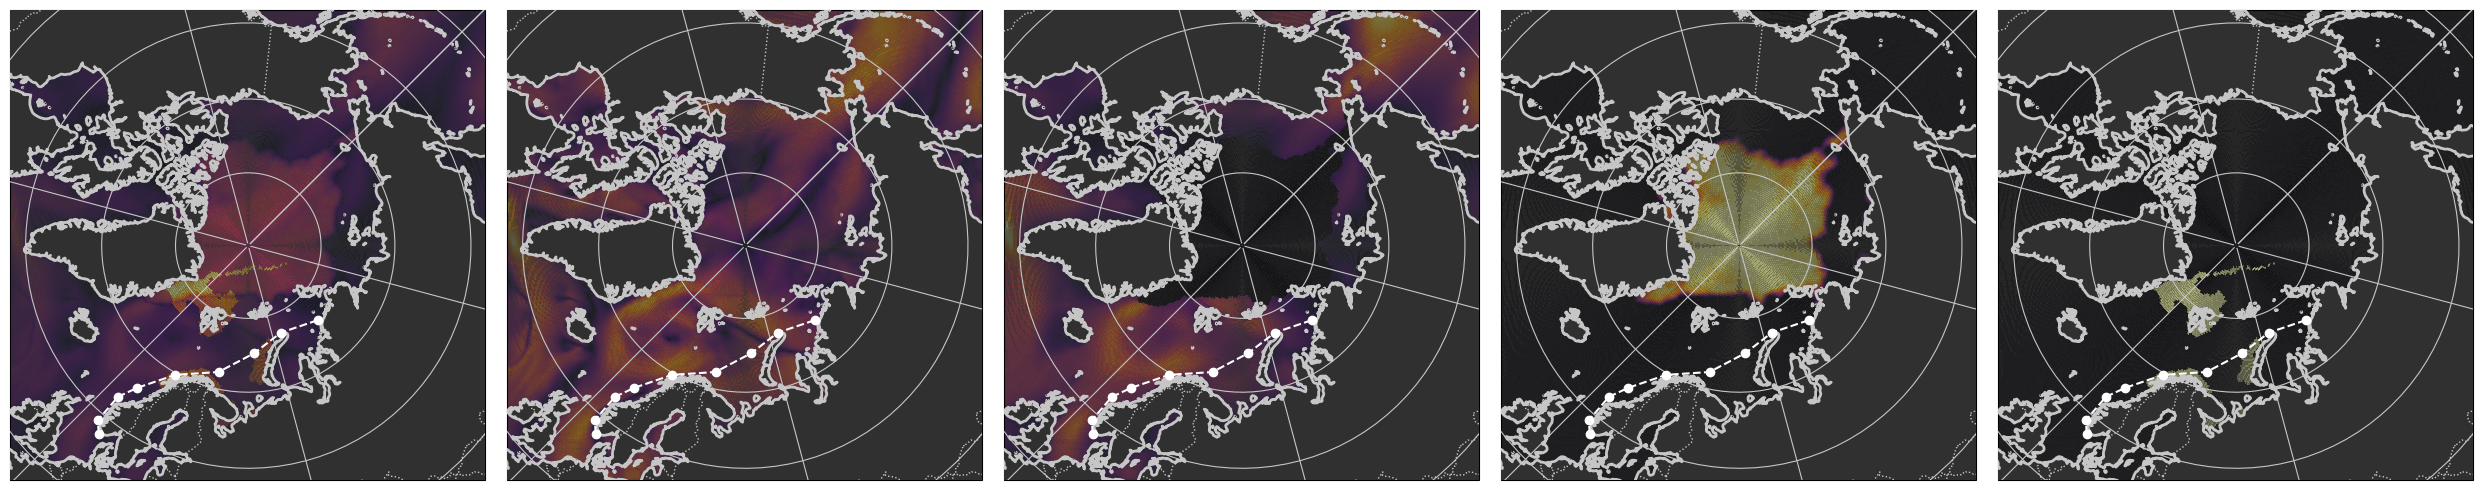

In [12]:
nrows = 1
ncols = 5

fig = plt.figure(figsize=[ncols*5,nrows*5])
stacked = [risk_info['w_risk'], risk_info['wspd'], risk_info['swh'], risk_info['sic'], risk_info['pac']]

for i in tqdm(range(ncols)):

    ax = fig.add_subplot(nrows, ncols, i+1, projection=ccrs.NorthPolarStereo(central_longitude=45))
    
    # Plot risk data
    plot_arctic_data(ax, stacked[i][0], risk_info["lons"], risk_info["lats"], cmap='inferno', zorder=1)

    # Plot Shipping Route
    _ = ax.plot(ship_info['lons'], ship_info['lats'], linestyle='--', color='white', marker='o', 
                transform=ccrs.PlateCarree(), zorder=11)
    
plt.tight_layout()

In [13]:
for i in tqdm(range(len(risk_info['date_idx']))):

    fig = plt.figure(figsize=[1*20,1*20])
    ax = fig.add_subplot(1, 1, 1, 
                        projection=ccrs.NorthPolarStereo(central_longitude=45))

    # Plot risk data
    plot_arctic_data(ax, risk_info["w_risk"][i], risk_info["lons"], risk_info["lats"], cmap='inferno', 
                     area=[-20, 65, 65, 80], zorder=1)
    
    # Plot Shipping route
    _ = ax.plot(ship_info['lons'], ship_info['lats'], linestyle='--', color='white', marker='o', 
                transform=ccrs.PlateCarree(), zorder=11)

    savefig(f'./plots/risk_assess_{risk_info["date_idx"][i]}.pdf')
    plt.close(fig)

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [06:27<00:00, 43.05s/it]


(-0.05, 1.05)

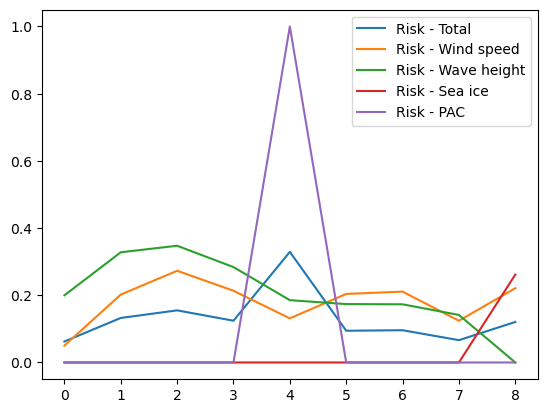

In [14]:
plt.plot(UHL_Future_Oct24['w_risk'], label='Risk - Total')
plt.plot(UHL_Future_Oct24['wspd'], label='Risk - Wind speed')
plt.plot(UHL_Future_Oct24['swh'], label='Risk - Wave height')
plt.plot(UHL_Future_Oct24['sic'], label='Risk - Sea ice')
plt.plot(UHL_Future_Oct24['pac'], label='Risk - PAC')
plt.legend()
plt.ylim(-0.05,1.05)

## 3. Arctic Rout Planner

In [15]:
UHL_Future_Route_1 = {'date':[1023,1024,1025,1026,1027,1028],
                    'lats':[74.5,74,73.5,72.5,70,67],
                    'lons':[141.5,150,160,170,180,190],
                    'pac_mask':[9,10,11,12,13,14,57,60],
                    'w_risk':[], 'wspd':[], 'swh':[], 'sic':[], 'pac':[]}

UHL_Future_Route_2 = {'date':[1023,1024,1025,1026,1027,1028],
                    'lats':[74.5,74,72,71,70,67],
                    'lons':[141.5,150,160,170,180,190],
                    'pac_mask':[9,10,11,12,13,14,57,60],
                    'w_risk':[], 'wspd':[], 'swh':[], 'sic':[], 'pac':[]}

In [16]:
assert UHL_Future_Route_1['date'] == UHL_Future_Route_2['date'], "Routes are comparable only if dates are same"

In [17]:
risk_info_1, ship_info_1 = risk_calc(UHL_Future_Route_1, era5_data, arcnet_data)
risk_info_2, ship_info_2 = risk_calc(UHL_Future_Route_2, era5_data, arcnet_data)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [01:08<00:00, 13.69s/it]


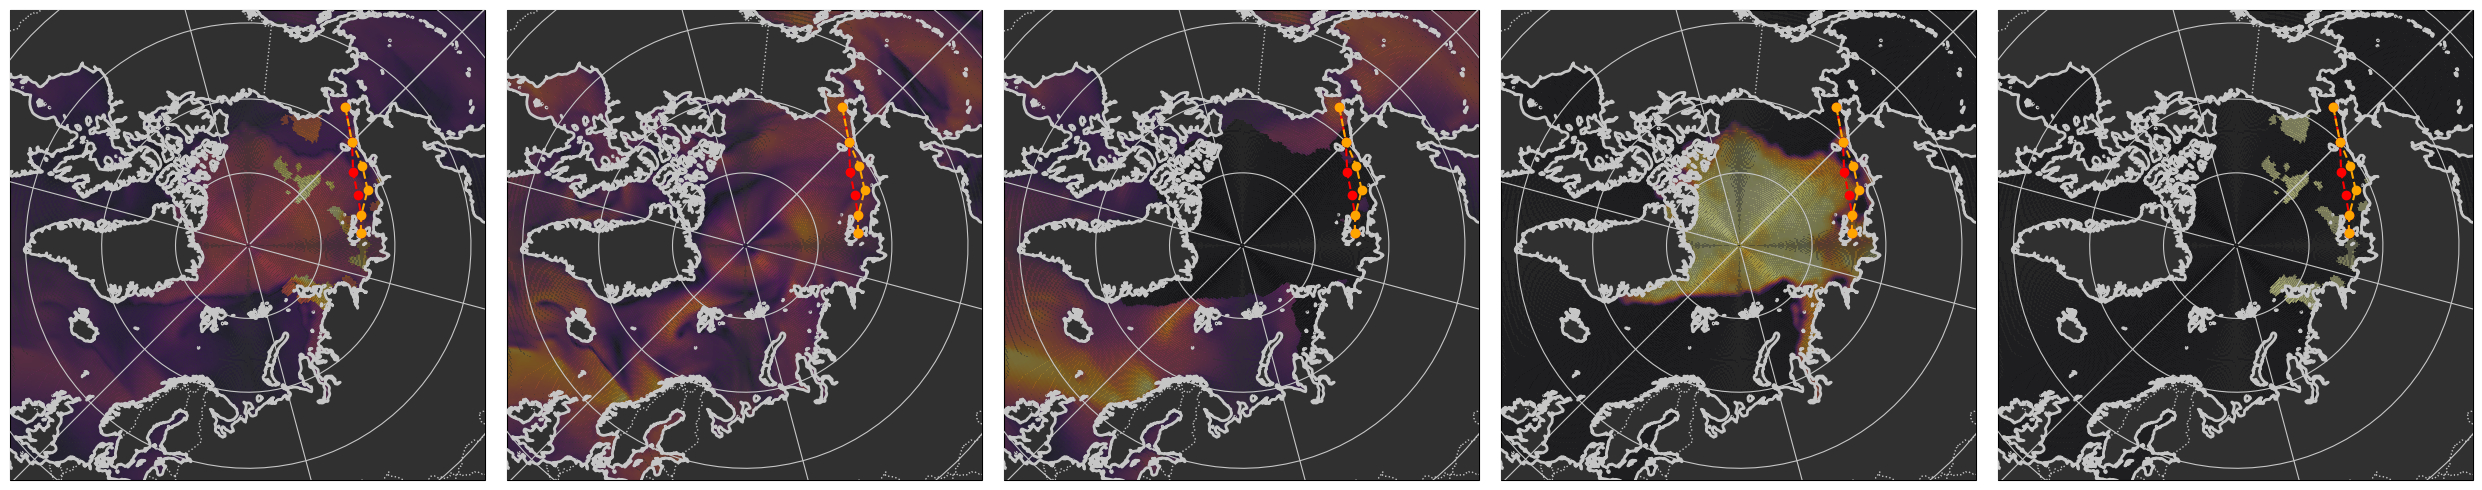

In [18]:
nrows = 1
ncols = 5

fig = plt.figure(figsize=[ncols*5,nrows*5])
stacked = [risk_info_1['w_risk'], risk_info_1['wspd'], risk_info_1['swh'], risk_info_1['sic'], risk_info_1['pac']]

for i in tqdm(range(ncols)):

    ax = fig.add_subplot(nrows, ncols, i+1, projection=ccrs.NorthPolarStereo(central_longitude=45))
    
    # Plot risk data
    plot_arctic_data(ax, stacked[i][0], risk_info_1["lons"], risk_info_1["lats"], cmap='inferno', zorder=1)

    # Plot Shipping Route 1
    _ = ax.plot(ship_info_1['lons'], ship_info_1['lats'], linestyle='--', color='red', marker='o', 
                transform=ccrs.PlateCarree(), zorder=11)
    
    # Plot Shipping Route 2
    _ = ax.plot(ship_info_2['lons'], ship_info_2['lats'], linestyle='--', color='orange', marker='o', 
                transform=ccrs.PlateCarree(), zorder=11)
    
plt.tight_layout()

In [19]:
for i in tqdm(range(len(risk_info_1["date_idx"]))):

    fig = plt.figure(figsize=[1*20,1*20])
    ax = fig.add_subplot(1, 1, 1, 
                         projection=ccrs.NorthPolarStereo(central_longitude=135))
    
    # Plot risk data
    plot_arctic_data(ax, risk_info_1["w_risk"][i], risk_info_1["lons"], risk_info_1["lats"], cmap='inferno', 
                     area=[144.5, 180.5, 66, 75], zorder=1)
    
    # Plot Shipping route 1
    _ = ax.plot(ship_info_1['lons'], ship_info_1['lats'], linestyle='--', linewidth=2, color='red', marker='o', markersize=15,
                transform=ccrs.PlateCarree(), zorder=11)
    
    # Plot Shipping route 2
    _ = ax.plot(ship_info_2['lons'], ship_info_2['lats'], linestyle='--', linewidth=2, color='orange', marker='o', markersize=15,
                transform=ccrs.PlateCarree(), zorder=11)
    
    # plt.tight_layout()
    savefig(f'./plots/risk_planner_{risk_info_1["date_idx"][i]}.pdf')
    plt.close(fig)

100%|██████████| 6/6 [04:33<00:00, 45.66s/it]


(-0.05, 0.55)

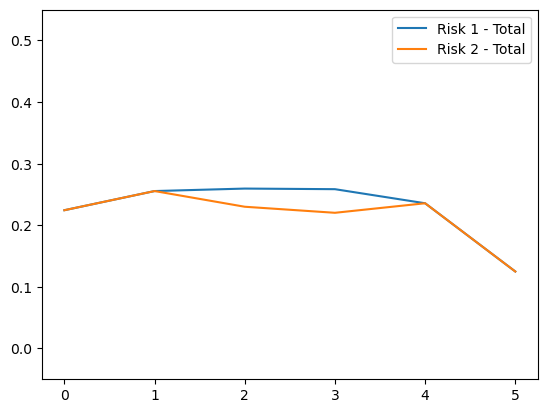

In [20]:
plt.plot(ship_info_1['w_risk'], label='Risk 1 - Total')
plt.plot(ship_info_2['w_risk'], label='Risk 2 - Total')
plt.legend()
plt.ylim(-0.05,0.55)

(2.0, 12.0)

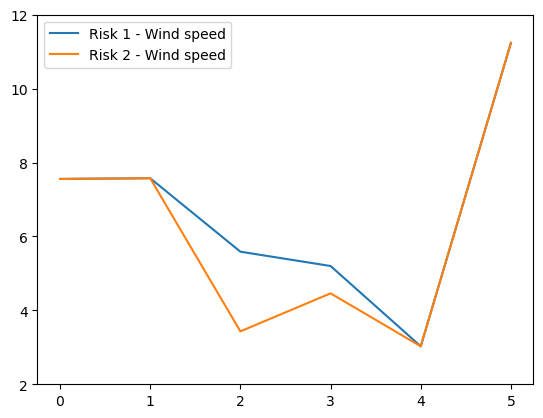

In [21]:
plt.plot([wspd * era5_data['wind_speed_max'] for wspd in ship_info_1['wspd']], label='Risk 1 - Wind speed')
plt.plot([wspd * era5_data['wind_speed_max'] for wspd in ship_info_2['wspd']], label='Risk 2 - Wind speed')
plt.legend()
plt.ylim(2,12)

(-0.05, 1.05)

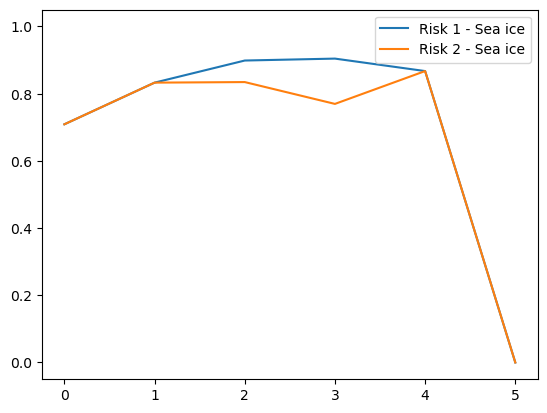

In [22]:
plt.plot(ship_info_1['sic'], label='Risk 1 - Sea ice')
plt.plot(ship_info_2['sic'], label='Risk 2 - Sea ice')
plt.legend()
plt.ylim(-0.05,1.05)